# Simple Implementation of [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset


In [552]:
import numpy as np
from matplotlib import pyplot as plt



def loadData(fileName, dataLen):
    """
    loads a file.data into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



    file = open(fileName, 'rb')
    data = [row.decode('utf-8').split(',') for row in file]
    file.close()

    data= data[:dataLen]

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1][:-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadData('iris-data/iris.data', 150)


# Normalize the data

mean:  [5.84333333 3.054      3.75866667 1.19866667]
std:  [0.82530129 0.43214658 1.75852918 0.76061262]


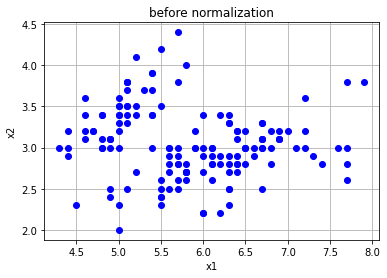

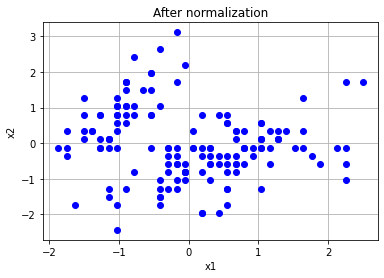

In [553]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [554]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOutput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOutput[i][true_i] =1

    return dataSetOutput
    
dataSetOutput =generateOuput(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], dataSetClass)
    

# Adding Bias

In [555]:
dataSetInput = np.append(dataSetInput, np.transpose([ np.ones(dataSetInput.shape[0]) ]), axis=1)
# testing 
# l = [[1, 2], [3, 4]]
# l = np.array(l)
# one = np.ones(l.shape[0])
# out = np.append(l, np.transpose([one]), axis=1)
# print(out)

# Split in train and test

In [556]:
# split into train and test
rand = np.random.rand(150) 

#inputs
dataSetTestInput = dataSetInput[rand > .5]
dataSetInput = dataSetInput[rand <= .5]

#output
dataSetTestOutput = dataSetOutput[rand > .5]
dataSetOutput = dataSetOutput[rand <= .5]

print(dataSetTestInput.shape)
print(dataSetInput.shape)

print(dataSetTestOutput.shape)
print(dataSetOutput.shape)




(65, 5)
(85, 5)
(65, 3)
(85, 3)


# Activation Functions

In [557]:
#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.transpose(np.exp(x).T/np.sum(np.exp(x), axis=1))}


def leekRelyDrevative(x, leak):
    if len(x.shape) != 1:
        x_vec = x.reshape(x.shape[0]*x.shape[1])
    else:
        x_vec = x

    y = []
    for i in range(len(x_vec)):
        if x_vec[i] >0:
            y.append(1)
            
        elif x_vec[i]<0:
            y.append(leak)
            
        else:
            y.append(0)

    y = np.array(y)
    return y.reshape(x.shape)


actDrevative = {'leakRelu':lambda x: leekRelyDrevative(x, .001),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](x))}

# Test
# x = np.array([1, 2, 3, 4, -10])
# y = actDrevative['leakRelu'](x)
# print(x)
# print(y)


# Defining  hidden layers

W.shape= (5, 10)


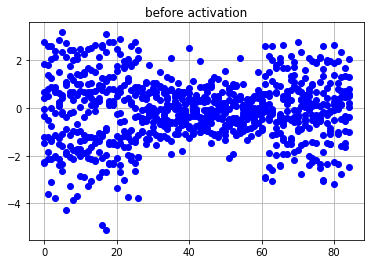

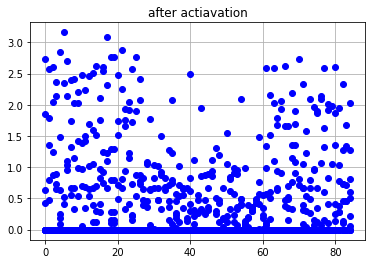

W.shape= (10, 3)


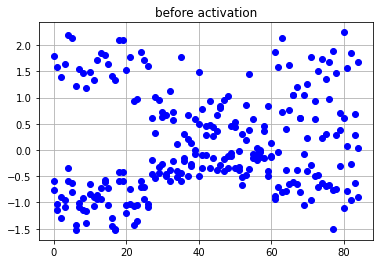

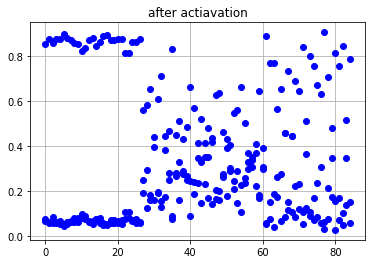

In [558]:
#init weights 
hiddenLayerSizes = [10, 3]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop



# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [559]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
# print(crossEntropyLoss(dataSetOutput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))
    return d

# test
# print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

# Forward Path

In [560]:
#forward path
def forward(dataInput, plot=False, debug=False):
    outputFlow_list = []
    outputFlow_list.append(dataInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        H = np.matmul(X, W) #matrix multplixation
        if debug:
            print("X: ", X.shape, ", W:", W.shape, " =H.shape=", H.shape)
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        if debug:
            print("after activation H: ",H.shape)
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
outputFlow_list = forward(dataSetInput)
for i in range(len(outputFlow_list)): 
    print("flow[", i, ']=', outputFlow_list[i][:1])
    print("flow[", i, ']=', outputFlow_list[i].shape)

flow[ 0 ]= [[-1.50652052  0.10644536 -1.2844067  -1.31297673  1.        ]]
flow[ 0 ]= (85, 5)
flow[ 1 ]= [[ 0.42443617 -0.32198714 -0.06627027 -1.47776211 -2.30994287  1.85347441
   2.73993865  0.64211453 -1.21907114 -2.26460021]]
flow[ 1 ]= (85, 10)
flow[ 2 ]= [[ 4.24436165e-01 -3.21987138e-04 -6.62702687e-05 -1.47776211e-03
  -2.30994287e-03  1.85347441e+00  2.73993865e+00  6.42114533e-01
  -1.21907114e-03 -2.26460021e-03]]
flow[ 2 ]= (85, 10)
flow[ 3 ]= [[-0.59362775 -0.7564909   1.7970082 ]]
flow[ 3 ]= (85, 3)
flow[ 4 ]= [[0.07830765 0.0665386  0.85515375]]
flow[ 4 ]= (85, 3)


# BackPropagation

In [561]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative = ",drev.shape, drev[:1] )
        print()
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    sigmoidDrev = actDrevative['sigmoid'](yBeforeSig) # 150 x 3
    drev = drev * sigmoidDrev
    if debug:
        print("2- dervative = ",drev.shape, drev[:1] )
        print("y-sigmoidDrev-inupt=", yBeforeSig[:1])
        print("y-sigmoidDrev-output=", sigmoidDrev[:1])
        print()


    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    if debug:
        print("3- dervative = ",drev.shape, drev[:1] )
        print()

    
    #4- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
#     reluDev = np.random.rand(150, 10)
    drev = drev * reluDev # elemet wise product
    if debug:
        print("reludev input=", outputFlow_list[-4][:1])
        print("reludev output", reluDev[:1])
        print("4- drevative = ",drev.shape, drev[:1] )
        print()

    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(5 x 150) (150 x 10) = (5 x 10)
    weights[-2] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
        
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input
    if debug:
        print("5- dervative = ",drev.shape, drev[:1] )

    
    
    

# Generic backpropagation

In [562]:
# back brobagation
def backpropagationGeneric(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    backIndex = -1
    y_hat = outputFlow_list[backIndex] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative (loss) = ",drev.shape, drev[:1] )
        print()
    
    # looping over all hidden layers
    for i in range(len(hiddenLayerSizes)-1, -1, -1):
        # 1- activation
        backIndex -= 1
        beforeActivaion  = outputFlow_list[backIndex]
        activationDrev = actDrevative[nonlinearities[i]](beforeActivaion) # 150 x 3
        drev = drev * activationDrev
        if debug:
            print("1- dervative = ",drev.shape, drev[:1] )
            print("y-before-activation=", beforeActivaion[:1])
            print("y-activation-dervative=", activationDrev[:1])
            print()     
        
        # 2- grad
        backIndex -= 1
        X = outputFlow_list[backIndex]
        grad_step = np.matmul(np.transpose(X), drev) # (10 x 150) (150 x 3) = (10 x 3)
        weights[i] -= lr * grad_step
        if debug:
            print("2- grad-step= ",grad_step.shape, grad_step[:1])

        
        # 3 drev throw the path
        drev = np.matmul(drev, np.transpose(weights[i])) # (150 x 3) (3 x 10) = (150 x 10)
        if debug:
            print("3- dervative = ",drev.shape, drev[:1] )
            print()

    
    


# Testing 

In [563]:
# evaluating test

def test(trueY, predictY, dataSetClass=1):
    """
    performing test and returns the accuracy of the data
    TODO return class names
    """
    predictIndex = np.argmax(predictY, axis=1) #along rows

    truePredicts =0
    counter =0
    for i in predictIndex:
        if trueY[counter][i] == 1:
            truePredicts +=1
        counter +=1
    return truePredicts/trueY.shape[0]



# Train

In [567]:
lossL = []
scoreL = []
def train(epochs, lr):
   
    for i in range(epochs):
        #forward
        outputFlow_list = forward(dataSetInput)

        #loss calculations
        loss = crossEntropyLoss(dataSetOutput, outputFlow_list[-1])
        lossL.append(loss)
        
        
        #backpropagation
#         backpropagationDetailed(lr, outputFlow_list, debug=False)
        backpropagationGeneric(lr, outputFlow_list, debug=False)

        
        # TESTING
        #forward
        print(dataSetTestInput.shape)
        outputFlow_list = forward(dataSetTestInput)
        print(outputFlow_list[-1].shape, dataSetTestOuput.shape)
        
        # test loop
        outputFlow_list = forward(dataSetInput)
        #evaluationg score
        score = test(dataSetTestOuput, outputFlow_list[-1])
        scoreL.append(score)
    

        
        print("Epoch: ",i, ", Loss=", loss, ", Score=", score )
        

In [568]:
train(1000, .01)



(65, 5)
(65, 3) (77, 3)


IndexError: index 77 is out of bounds for axis 0 with size 77

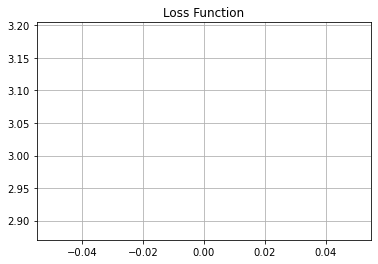

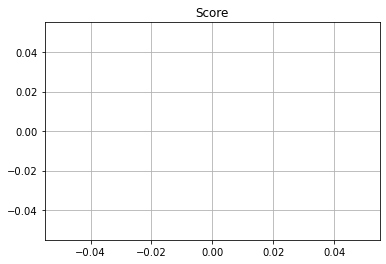

ValueError: zero-size array to reduction operation maximum which has no identity

In [569]:
plt.plot(lossL)
plt.grid(True)
plt.title("Loss Function")
plt.show()

plt.plot(scoreL)
plt.grid(True)
plt.title("Score")
plt.show()

print("max-score=", np.max(scoreL))
